In [1]:

%matplotlib inline
import csv
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from pymatgen.electronic_structure.plotter import BSDOSPlotter, BSPlotter, DosPlotter
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun

import pickle 
from  tqdm import tqdm

import os
import re
import qeschema


In [28]:
import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)


In [12]:
%load_ext autoreload
%autoreload 2

import qe_BS_DOS
import wannier_loader 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Wannier

In [ ]:
wan = wannier_loader.Wannier_loader('./', 'Fe')
wan.load_wannier90()
wan.get_dense_hk()
wan.write_amulet()

In [136]:
wan = wannier_loader.Wannier_loader('./', 'Fe')
wan.get_hr_from_amulet(4)

Unit Cell Volume:   12.3211  (Ang^3)
nwa  9
Rpts 597
2 1728 9


100%|██████████| 597/597 [00:07<00:00, 77.30it/s]


In [139]:
wan.R_coords

[[-6.0, 2.0, -4.0],
 [-6.0, 3.0, -3.0],
 [-6.0, 4.0, -2.0],
 [-5.0, 0.0, -3.0],
 [-5.0, 1.0, -4.0],
 [-5.0, 1.0, -3.0],
 [-5.0, 1.0, -2.0],
 [-5.0, 2.0, -5.0],
 [-5.0, 2.0, -4.0],
 [-5.0, 2.0, -3.0],
 [-5.0, 2.0, -2.0],
 [-5.0, 2.0, -1.0],
 [-5.0, 3.0, -4.0],
 [-5.0, 3.0, -3.0],
 [-5.0, 3.0, -2.0],
 [-5.0, 3.0, -1.0],
 [-5.0, 3.0, 0.0],
 [-5.0, 4.0, -3.0],
 [-5.0, 4.0, -2.0],
 [-5.0, 4.0, -1.0],
 [-5.0, 5.0, -2.0],
 [-4.0, -2.0, -2.0],
 [-4.0, -1.0, -3.0],
 [-4.0, -1.0, -2.0],
 [-4.0, -1.0, -1.0],
 [-4.0, 0.0, -4.0],
 [-4.0, 0.0, -3.0],
 [-4.0, 0.0, -2.0],
 [-4.0, 0.0, -1.0],
 [-4.0, 0.0, 0.0],
 [-4.0, 1.0, -5.0],
 [-4.0, 1.0, -4.0],
 [-4.0, 1.0, -3.0],
 [-4.0, 1.0, -2.0],
 [-4.0, 1.0, -1.0],
 [-4.0, 1.0, 0.0],
 [-4.0, 1.0, 1.0],
 [-4.0, 2.0, -6.0],
 [-4.0, 2.0, -5.0],
 [-4.0, 2.0, -4.0],
 [-4.0, 2.0, -3.0],
 [-4.0, 2.0, -2.0],
 [-4.0, 2.0, -1.0],
 [-4.0, 2.0, 0.0],
 [-4.0, 2.0, 1.0],
 [-4.0, 2.0, 2.0],
 [-4.0, 3.0, -5.0],
 [-4.0, 3.0, -4.0],
 [-4.0, 3.0, -3.0],
 [-4.0, 3.0, -2.0],
 [-

In [138]:
with printoptions(precision=2, suppress=True):
    # print(wan.h_amulet[:,:, 0,0])
    print(np.real(wan.h_amulet[:,:, 0,0]))
    print(np.real(wan.hks_bs[0]))


[[ 15.44  -0.     0.    -0.     0.     0.     0.     0.     0.  ]
 [ -0.    14.37   0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.    14.37   0.     0.     0.     0.     0.     0.  ]
 [ -0.     0.     0.    15.43   0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.    14.37   0.     0.    -0.     0.  ]
 [  0.     0.     0.     0.     0.   -37.35  -0.     0.     0.  ]
 [  0.     0.     0.     0.     0.    -0.     0.     0.     0.  ]
 [  0.     0.     0.     0.    -0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     7.88]]
[[ 14.03  -0.     0.    -0.    -0.01   0.     0.     0.     0.02]
 [ -0.    13.37  -0.01  -0.    -0.    -0.04  -0.     0.01   0.04]
 [  0.    -0.01  13.38  -0.     0.    -0.    -0.01   0.    -0.04]
 [ -0.    -0.    -0.    14.01   0.     0.     0.    -0.     0.  ]
 [ -0.01  -0.     0.     0.    13.37   0.     0.     0.04  -0.  ]
 [  0.    -0.04  -0.     0.     0.   -16.89  -1.13   1.12   0.  ]
 [  0.   

In [137]:
wan.load_kpath('./kpaths/kpath_qe2.dat')
bstr = wan.get_wannier_BS()

100%|██████████| 101/101 [00:00<00:00, 273.18it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


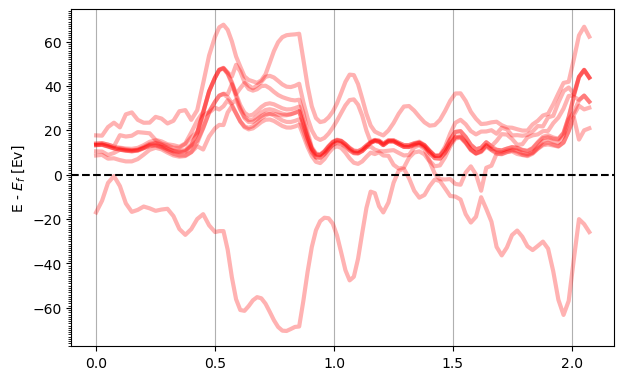

In [140]:
fig, dd = plt.subplots()  # Create a figure containing a single axes.


for band in range(9):

        dd.plot(wan.kpath_dists_qe,#/9.07729*4.1463,#/1.27733*0.5, 
                bstr[ : , band] ,  color='r', alpha=0.3, linewidth=3)

dd.set_ylabel(r'E - $E_f$ [Ev]')  # Add an x-label to the axes.
# dd.set_xlabel('rho')  # Add a y-label to the axes.
# dd.set_title("pk/p from density")
dd.legend(prop={'size': 8}, loc='upper right', frameon=False)  # Add a legend.
# plt.xticks(normal_ticks, label_ticks)
dd.yaxis.set_minor_locator(MultipleLocator(1))
plt.grid(axis='x')
dd.axhline(y=0, ls='--', color='k')
# plt.xlim(normal_ticks[0], normal_ticks[-1])
# plt.ylim(-5, 3)

width = 7
fig.set_figwidth(width)     #  ширина и
fig.set_figheight(width/1.6)    #  высота "Figure"
# plt.savefig('./2pub/pics/BS_wannier.png', dpi=200, bbox_inches='tight')

plt.show()

# QE

In [10]:
bb = qe_BS_DOS.VASP_analyse_spinpolarized_3D('./', 'Fe')

efermi 16.50
Unit Cell Volume:   12.3211  (Ang^3)
Reciprocal-Space Vectors (Ang^-1)
[[ 2.1591712401  0.            2.1591712401]
 [-2.1591712401  2.1591712401  0.          ]
 [ 0.           -2.1591712401  2.1591712401]]
Real-Space Vectors (Ang)
[[ 1.454999305  1.454999305  1.454999305]
 [-1.454999305  1.454999305  1.454999305]
 [-1.454999305 -1.454999305  1.454999305]]
['G', 'H', 'N', 'G', 'P', 'H']


In [42]:
bb.get_qe_kpathBS()

G
H
N
G
P
H


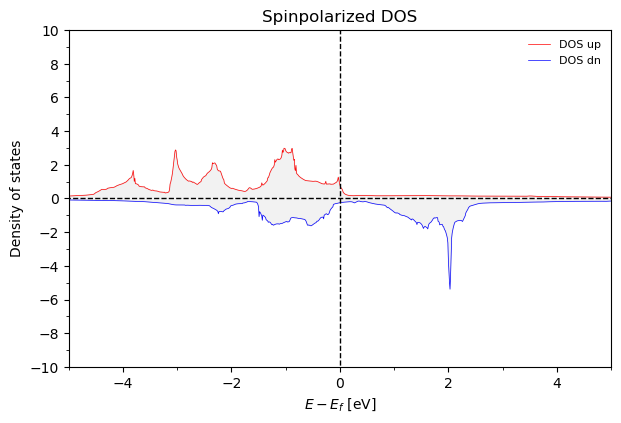

In [6]:
bb.plot_FullDOS()

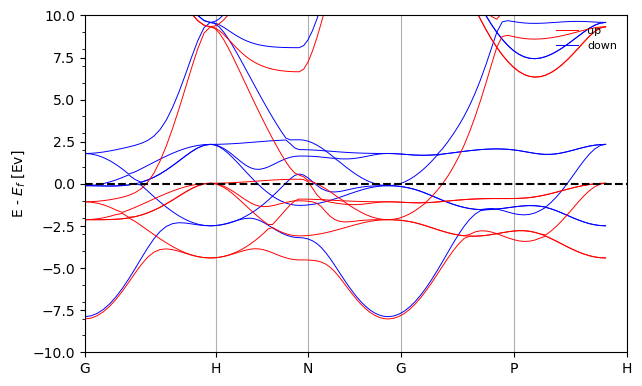

In [5]:
bb.plot_BS()

In [92]:
np.array([ 15.44-0.j,  15.43-0.j, -37.35-0.j,   0.,  -0.j,   0.,  -0.j,  14.37-0.j,
  14.37-0.j,  14.37+0.j,   7.88-0.j]) - 16.50

array([ -1.06+0.j,  -1.07+0.j, -53.85+0.j, -16.5 +0.j, -16.5 -0.j,
       -16.5 +0.j, -16.5 -0.j,  -2.13+0.j,  -2.13+0.j,  -2.13+0.j,
        -8.62+0.j])

In [93]:
bb.print_bands_range(4, 14)

efermi 16.50
-------------SPIN UP---------------
band 5 eV from  8.48 to  13.54                 eV-eF from  -8.02 to  -2.96
band 6 eV from  12.10 to  14.48                 eV-eF from  -4.40 to  -2.02
band 7 eV from  13.42 to  16.53                 eV-eF from  -3.08 to  0.03
band 8 eV from  14.37 to  16.53                 eV-eF from  -2.13 to  0.03
band 9 eV from  14.80 to  16.77                 eV-eF from  -1.70 to  0.27
band 10 eV from  15.37 to  25.83                 eV-eF from  -1.13 to  9.33
band 11 eV from  22.84 to  40.32                 eV-eF from  6.34 to  23.82
band 12 eV from  24.60 to  40.32                 eV-eF from  8.10 to  23.82
band 13 eV from  26.28 to  40.85                 eV-eF from  9.78 to  24.35
band 14 eV from  31.34 to  53.51                 eV-eF from  14.84 to  37.01
-------------SPIN DN---------------
band 5 eV from  8.61 to  15.10                 eV-eF from  -7.89 to  -1.40
band 6 eV from  14.01 to  16.50                 eV-eF from  -2.49 to  0.00
band 7 e

efermi 16.50


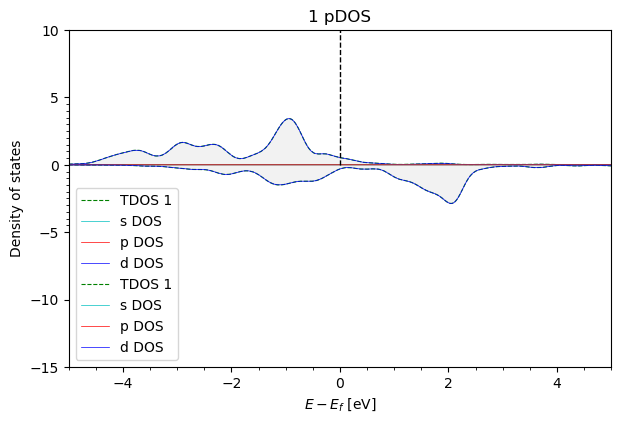

In [9]:
bb = qe_BS_DOS.VASP_analyse_spinpolarized_3D('./', 'Fe')

bb.get_pDOS()
bb.plot_pDOS()

# BS FM 

In [38]:
efermi = 8.176


# DOS

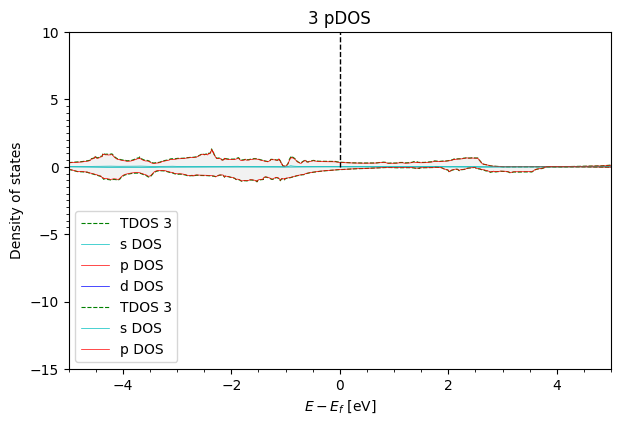

In [4]:
DOS().plot_FeDOS("3")


# Wannier bands

In [5]:
def load_kpath(path):
    k_path = []
    kpath_draw = []

    with open(path) as f:
        for line in f:
            kpts_string = line.split()
            k_path.append(np.array([
                float(kpts_string[1]), float(kpts_string[2]), float(kpts_string[3])
            ]))
            kpath_draw.append(float(kpts_string[4]))

    k_path = np.array(k_path)   
    kpath_draw = np.array(kpath_draw)   
    return k_path, kpath_draw

k_path, kpath_draw = load_kpath('kpaths/kpath_qe_cryst.dat')

In [6]:
with open('hr_mn_up.pickle', 'rb') as f:
    hr_mn_up = pickle.load(f)

with open('hr_mn_dn.pickle', 'rb') as f:
    hr_mn_dn = pickle.load(f)

In [7]:

def get_wannier_BS(complex_hr): 
    band_str = []
    orbitals = range(11)
    for k in tqdm(k_path):#[[0.2,0], [0.3,0]]:
        hk = []
        for m in orbitals:
            hk_m = []
            for n in orbitals:
                hr_mn = complex_hr[ (complex_hr[:,3]==m+1)*(complex_hr[:,4]==n+1)]
                hk_m.append( np.sum( np.exp(2*np.pi*1.j* np.dot(k, dot[:3]) )*dot[5] for dot in hr_mn)  )
            hk.append(hk_m)

        hk = np.array(hk).T
        # plt.imshow(np.real(hk))
        # print(np.real(np.linalg.eig(hk)[0]))
        # break
        band_str.append(np.sort(np.real(np.linalg.eig(hk)[0])))
    band_str = np.array(band_str)
    return band_str

hr_up_w = get_wannier_BS(hr_mn_up)
hr_dn_w = get_wannier_BS(hr_mn_dn)

  0%|          | 0/36 [00:00<?, ?it/s]

100%|██████████| 36/36 [00:20<00:00,  1.78it/s]


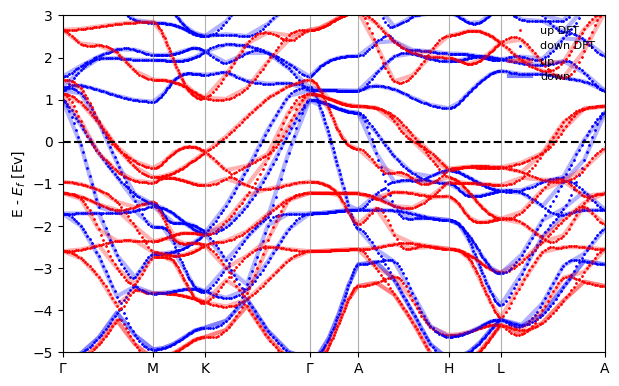

In [29]:
fig, dd = plt.subplots()  # Create a figure containing a single axes.


for band in range(20):
    if band == 0:
        dd.scatter(hr_up[band, : ,0],#/1.27733*0.5, 
                hr_up[band, : , 1] - efermi, label='up DFT', color='red',s=1.0, #linewidth=0.7,
                    alpha=1.0)

        dd.scatter(hr_dn[band, : ,0],#/1.27733*0.5, 
                hr_dn[band, : , 1] - efermi, label='down DFT', color='blue',s=1.0, #linewidth=0.7,
                    alpha=1.0)
        
        
    else:
        dd.scatter(hr_up[band, : ,0],#/1.27733*0.5, 
              hr_up[band, : , 1] - efermi,  color='red',s=1.0, #linewidth=0.7,
                alpha=1.0)

        dd.scatter(hr_dn[band, : ,0],#/1.27733*0.5, 
              hr_dn[band, : , 1] - efermi,  color='blue',s=1.0, #linewidth=0.7,
                alpha=1.0)
       

# for band in range(nwa):
#     if band == 0:
#         dd.plot(hr_up[band, : ,0],#/1.27733*0.5, 
#                 hr_up[band, : , 1] - efermi, label='up', color='red', linewidth=0.7,
#                     alpha=1.0)

#         dd.plot(hr_dn[band, : ,0],#/1.27733*0.5, 
#                 hr_dn[band, : , 1] - efermi, label='down', color='blue', linewidth=0.7,
#                     alpha=1.0)
#     else:
#         dd.plot(hr_up[band, : ,0],#/1.27733*0.5, 
#               hr_up[band, : , 1] - efermi,  color='red', linewidth=0.7,
#                 alpha=1.0)

#         dd.plot(hr_dn[band, : ,0],#/1.27733*0.5, 
#               hr_dn[band, : , 1] - efermi,  color='blue', linewidth=0.7,
#                 alpha=1.0)


for band in range(11):
    if band == 0:
        
        dd.plot(kpath_draw,#/9.07729*4.1463, 
                hr_up_w[ : , band]- efermi , label='up', color='r', alpha=0.5, linewidth=3)

        dd.plot(kpath_draw,#/9.07729*4.1463,#/1.27733*0.5, 
                hr_dn_w[ : , band]- efermi , label='down', color='b', alpha=0.5, linewidth=3)
        
    else:
        
        
        dd.plot(kpath_draw,#/9.07729*4.1463,#/1.27733*0.5, 
                hr_up_w[ : , band]- efermi ,  color='r', alpha=0.3, linewidth=3)

        dd.plot(kpath_draw,#/9.07729*4.1463,#/1.27733*0.5, 
                hr_dn_w[: , band]- efermi ,  color='b', alpha=0.3, linewidth=3)


dd.set_ylabel(r'E - $E_f$ [Ev]')  # Add an x-label to the axes.
# dd.set_xlabel('rho')  # Add a y-label to the axes.
# dd.set_title("pk/p from density")
dd.legend(prop={'size': 8}, loc='upper right', frameon=False)  # Add a legend.
plt.xticks(normal_ticks, label_ticks)
dd.yaxis.set_minor_locator(MultipleLocator(1))
plt.grid(axis='x')
dd.axhline(y=0, ls='--', color='k')
plt.xlim(normal_ticks[0], normal_ticks[-1])
plt.ylim(-5, 3)

width = 7
fig.set_figwidth(width)     #  ширина и
fig.set_figheight(width/1.6)    #  высота "Figure"
# plt.savefig('./2pub/pics/BS_wannier.png', dpi=200, bbox_inches='tight')

plt.show()

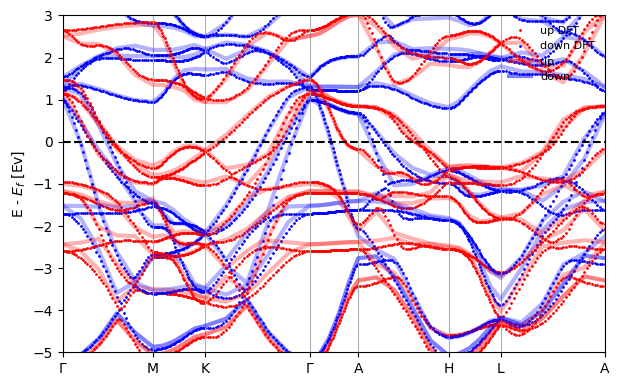

In [8]:
fig, dd = plt.subplots()  # Create a figure containing a single axes.


for band in range(20):
    if band == 0:
        dd.scatter(hr_up[band, : ,0],#/1.27733*0.5, 
                hr_up[band, : , 1] - efermi, label='up DFT', color='red',s=1.0, #linewidth=0.7,
                    alpha=1.0)

        dd.scatter(hr_dn[band, : ,0],#/1.27733*0.5, 
                hr_dn[band, : , 1] - efermi, label='down DFT', color='blue',s=1.0, #linewidth=0.7,
                    alpha=1.0)
        
        
    else:
        dd.scatter(hr_up[band, : ,0],#/1.27733*0.5, 
              hr_up[band, : , 1] - efermi,  color='red',s=1.0, #linewidth=0.7,
                alpha=1.0)

        dd.scatter(hr_dn[band, : ,0],#/1.27733*0.5, 
              hr_dn[band, : , 1] - efermi,  color='blue',s=1.0, #linewidth=0.7,
                alpha=1.0)
       

# for band in range(nwa):
#     if band == 0:
#         dd.plot(hr_up[band, : ,0],#/1.27733*0.5, 
#                 hr_up[band, : , 1] - efermi, label='up', color='red', linewidth=0.7,
#                     alpha=1.0)

#         dd.plot(hr_dn[band, : ,0],#/1.27733*0.5, 
#                 hr_dn[band, : , 1] - efermi, label='down', color='blue', linewidth=0.7,
#                     alpha=1.0)
#     else:
#         dd.plot(hr_up[band, : ,0],#/1.27733*0.5, 
#               hr_up[band, : , 1] - efermi,  color='red', linewidth=0.7,
#                 alpha=1.0)

#         dd.plot(hr_dn[band, : ,0],#/1.27733*0.5, 
#               hr_dn[band, : , 1] - efermi,  color='blue', linewidth=0.7,
#                 alpha=1.0)


for band in range(11):
    if band == 0:
        
        dd.plot(kpath_draw,#/9.07729*4.1463, 
                hr_up_w[ : , band]- efermi , label='up', color='r', alpha=0.5, linewidth=3)

        dd.plot(kpath_draw,#/9.07729*4.1463,#/1.27733*0.5, 
                hr_dn_w[ : , band]- efermi , label='down', color='b', alpha=0.5, linewidth=3)
        
    else:
        
        
        dd.plot(kpath_draw,#/9.07729*4.1463,#/1.27733*0.5, 
                hr_up_w[ : , band]- efermi ,  color='r', alpha=0.3, linewidth=3)

        dd.plot(kpath_draw,#/9.07729*4.1463,#/1.27733*0.5, 
                hr_dn_w[: , band]- efermi ,  color='b', alpha=0.3, linewidth=3)


dd.set_ylabel(r'E - $E_f$ [Ev]')  # Add an x-label to the axes.
# dd.set_xlabel('rho')  # Add a y-label to the axes.
# dd.set_title("pk/p from density")
dd.legend(prop={'size': 8}, loc='upper right', frameon=False)  # Add a legend.
plt.xticks(normal_ticks, label_ticks)
dd.yaxis.set_minor_locator(MultipleLocator(1))
plt.grid(axis='x')
dd.axhline(y=0, ls='--', color='k')
plt.xlim(normal_ticks[0], normal_ticks[-1])
plt.ylim(-5, 3)

width = 7
fig.set_figwidth(width)     #  ширина и
fig.set_figheight(width/1.6)    #  высота "Figure"
# plt.savefig('./2pub/pics/BS_wannier.png', dpi=200, bbox_inches='tight')

plt.show()

In [ ]:
# Assuming the variables nspin, nkp, and hdim are defined
nspin = 2  # Example value, set to the actual number of spin states
nkp = 10   # Example value, set to the actual number of k-points
hdim = 5   # Example value, set to the actual Hamiltonian matrix dimension

# Initialize the Hamiltonian matrix
h = np.zeros((hdim, hdim, nkp, nspin), dtype=complex)

# Open the file containing the Hamiltonian matrix elements
with open('hamilt.dat', 'r') as iunhamilt:
    for ispin in range(nspin):
        for ik in range(nkp):
            for i in range(hdim):
                for j in range(i, hdim):
                    # Read the real and imaginary parts from the file
                    Hre, Him = map(float, iunhamilt.readline().split())
                    h[i, j, ik, ispin] = complex(Hre, Him)
                    h[j, i, ik, ispin] = np.conj(h[i, j, ik, ispin])